In [ ]:
# Import necessary libraries  # 导入必要的库
import yfinance as yf          # For fetching stock data  # 用于获取股票数据
import numpy as np             # Numerical computing library  # 数值计算库
import matplotlib.pyplot as plt # Plotting library  # 绘图库
from scipy.stats import norm   # Statistical distributions library  # 统计分布库
import seaborn as sns          # Chart beautification library  # 美化图表库
import pandas as pd            # Data processing library  # 数据处理库

# Set chart style to dark grid  # 设置图表风格为深色网格
sns.set_style('darkgrid')

$$S_t = S_0e^{(\mu + r - \frac{\sigma^2}{2})t + \sigma\sqrt{t}\mathcal{N}(0,1)}$$

### Model stock path movement from time 0 to time t with multiple steps

--- Break up $0$ to $t$ into $n$ discrete intervals and set dt = t/n.

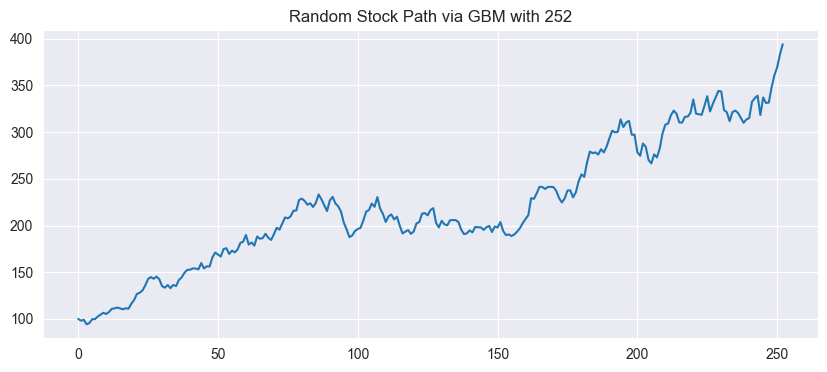

In [ ]:
# It will be important for us to model stock paths with multiple steps
# 模拟单条股票价格路径很重要

S0 = 100        # Initial stock price  # 初始股价
sigma = .456    # Volatility (annualized)  # 波动率（年化）
t = 1           # Time period (1 year)  # 时间周期（1年）
r = .035        # Risk-free rate  # 无风险利率
mu = .8         # Drift rate (expected return)  # 漂移率（预期收益率）
steps = 252     # Number of time steps (usually corresponds to trading days in a year)  # 时间步数（通常对应一年的交易日数）

# Generate standard normal random noise  # 生成标准正态分布的随机噪声
noise = np.random.normal(loc=0, scale=1, size=steps)

# Calculate time step size  # 计算时间步长
dt = t/steps

# Calculate log returns for each time step  # 计算每个时间步的对数收益率
# Formula: (μ + r - σ²/2)dt + σ√dt * ε  # 公式：(μ + r - σ²/2)dt + σ√dt * ε
log_returns = (mu+r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

# Cumulative log returns  # 累积对数收益率
exponent = np.cumsum(log_returns)

# Get stock price path through exponential transformation  # 通过指数变换得到股价路径
path = S0*np.exp(exponent)

# Insert initial stock price at the beginning of the path  # 在路径开始处插入初始股价
path_from_start = np.insert(path, 0, S0)

# Plot stock price path  # 绘制股价路径图
plt.figure(figsize=(10,4))
plt.plot(path_from_start)
plt.title(f'Random Stock Path via GBM with {steps} steps')
plt.show()

In [ ]:
# It will be important for us to model many stock paths with multiple steps
# 模拟多条股票价格路径很重要

S0 = 100          # Initial stock price  # 初始股价
sigma = .456      # Volatility  # 波动率
t = 1             # Time period (1 year)  # 时间周期（1年）
r = .035          # Risk-free rate  # 无风险利率
mu = -.92         # Drift rate (negative value indicates expected decline)  # 漂移率（负值表示预期下跌）
n_sims = 20       # Number of simulation paths  # 模拟路径数量
n_steps = 252*10  # Number of time steps (10 years of trading days)  # 时间步数（10年的交易日）

# Generate multidimensional random noise matrix (n_sims rows, n_steps columns)  # 生成多维随机噪声矩阵（n_sims行，n_steps列）
noise = np.random.normal(loc=0, scale=1, size=(n_sims, n_steps))

# Calculate time step size  # 计算时间步长
dt = t/n_steps

# Calculate log returns for each time step (compute for all paths simultaneously)  # 计算每个时间步的对数收益率（对所有路径同时计算）
log_returns = (mu+r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

# Cumulative log returns along time axis (axis=1 means cumsum by row)  # 沿着时间轴累积对数收益率（axis=1表示按行累积）
exponent = np.cumsum(log_returns, axis=1)

# Calculate stock prices for all paths  # 计算所有路径的股价
paths = S0*np.exp(exponent)

# Insert initial stock price at the beginning of each path  # 在每条路径开始处插入初始股价
paths_from_start = np.insert(paths, 0, S0, axis=1)

In [ ]:
# Define GBM path generation function  # 定义GBM路径生成函数
def GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps):
    """
    Generate Geometric Brownian Motion stock price paths
    生成几何布朗运动股票价格路径
    
    Parameters:  # 参数:
    S0: Initial stock price  # 初始股价
    sigma: Volatility  # 波动率
    t: Time period  # 时间周期
    r: Risk-free rate  # 无风险利率
    mu: Drift rate  # 漂移率
    n_sims: Number of simulation paths  # 模拟路径数量
    n_steps: Number of time steps  # 时间步数
    
    Returns:  # 返回:
    paths_from_start: Complete path matrix including initial stock price  # 包含初始股价的完整路径矩阵
    """
    # Generate random noise matrix  # 生成随机噪声矩阵
    noise = np.random.normal(loc=0, scale=1, size=(n_sims, n_steps))

    # Calculate time step size  # 计算时间步长
    dt = t/n_steps

    # Calculate log returns  # 计算对数收益率
    log_returns = (mu+r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

    # Cumulative log returns  # 累积对数收益率
    exponent = np.cumsum(log_returns, axis=1)

    # Calculate stock price paths  # 计算股价路径
    paths = S0*np.exp(exponent)

    # Insert initial stock price at the beginning  # 在开始处插入初始股价
    paths_from_start = np.insert(paths, 0, S0, axis=1)
    
    return paths_from_start

In [33]:
# Call GBM function to generate stock price paths  # 调用GBM函数生成股票价格路径
GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps)

array([[100.        ,  97.09596082,  94.71834471, ..., 220.59005803,
        222.64876112, 220.85666204],
       [100.        ,  97.5037982 ,  95.31887453, ..., 108.80215836,
        110.52162408, 109.92330967],
       [100.        , 103.54650062, 104.43969949, ..., 143.17160539,
        142.39545019, 142.48709278],
       ...,
       [100.        , 102.36220604, 104.91759629, ..., 114.01170961,
        113.2130036 , 113.81375233],
       [100.        , 102.03563475, 105.21774429, ..., 114.56701693,
        115.73917376, 117.82151067],
       [100.        ,  97.2591864 ,  97.04378371, ..., 124.65069549,
        125.54886692, 125.34428432]], shape=(20, 253))

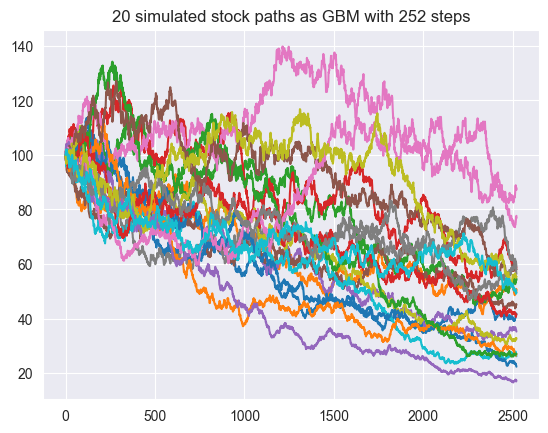

In [34]:
# Plot all simulated stock price paths  # 绘制所有模拟的股票价格路径
plt.figure()

# Draw line plots for each path  # 为每条路径绘制线图
for path in paths_from_start:
    plt.plot(path)
    
# Set chart title and display  # 设置图表标题和显示
plt.title(f'{n_sims} simulated stock paths as GBM with {n_steps} steps')
plt.show()

## 为什么需要对数收益率和指数变换？

让我们来比较三种不同的股价建模方法：

1. **正确的GBM方法**（使用对数收益率 + 指数变换）
2. **错误方法1**：直接使用正态分布随机数作为股价变化
3. **错误方法2**：使用算术收益率而非对数收益率

让我们看看它们的区别：

In [ ]:
# Set same parameters  # 设置相同的参数
S0 = 100
sigma = 0.3
t = 1
r = 0.05
mu = 0.1
n_steps = 252
np.random.seed(42)  # Fix random seed for comparison  # 固定随机种子以便比较

# Method 1: Correct GBM method (log returns + exponential transformation)  # 方法1：正确的GBM方法（对数收益率 + 指数变换）
print("Method 1: Correct GBM method")  # print("方法1：正确的GBM方法")
dt = t/n_steps
noise1 = np.random.normal(0, 1, n_steps)
log_returns = (mu + r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*noise1
path1 = S0 * np.exp(np.cumsum(log_returns))
path1 = np.insert(path1, 0, S0)
print(f"Final stock price: {path1[-1]:.2f}")  # print(f"最终股价: {path1[-1]:.2f}")
print(f"Minimum stock price: {path1.min():.2f}")  # print(f"最低股价: {path1.min():.2f}")
print(f"Maximum stock price: {path1.max():.2f}")  # print(f"最高股价: {path1.max():.2f}")
print()

# Method 2: Wrong method - directly use normal distribution as stock price changes  # 方法2：错误方法 - 直接用正态分布作为股价变化
print("Method 2: Direct use of normal distribution random numbers")  # print("方法2：直接用正态分布随机数")
np.random.seed(42)
noise2 = np.random.normal(0, 1, n_steps)
# Wrong: directly treat random numbers as stock price changes  # 错误：直接将随机数当作股价变化
price_changes = sigma * noise2 * np.sqrt(dt)
path2 = np.zeros(n_steps + 1)
path2[0] = S0
for i in range(1, n_steps + 1):
    path2[i] = path2[i-1] + price_changes[i-1]
print(f"Final stock price: {path2[-1]:.2f}")  # print(f"最终股价: {path2[-1]:.2f}")
print(f"Minimum stock price: {path2.min():.2f}")  # Note: may become negative!  # print(f"最低股价: {path2.min():.2f}")  # 注意：可能出现负数！
print(f"Maximum stock price: {path2.max():.2f}")  # print(f"最高股价: {path2.max():.2f}")
print()

# Method 3: Use arithmetic returns instead of log returns  # 方法3：使用算术收益率而非对数收益率
print("Method 3: Use arithmetic returns")  # print("方法3：使用算术收益率")
np.random.seed(42)
noise3 = np.random.normal(0, 1, n_steps)
# Wrong: use arithmetic returns  # 错误：使用算术收益率
arithmetic_returns = mu*dt + sigma*np.sqrt(dt)*noise3
path3 = np.zeros(n_steps + 1)
path3[0] = S0
for i in range(1, n_steps + 1):
    path3[i] = path3[i-1] * (1 + arithmetic_returns[i-1])
print(f"Final stock price: {path3[-1]:.2f}")  # print(f"最终股价: {path3[-1]:.2f}")
print(f"Minimum stock price: {path3.min():.2f}")  # print(f"最低股价: {path3.min():.2f}")
print(f"Maximum stock price: {path3.max():.2f}")  # print(f"最高股价: {path3.max():.2f}")

方法1：正确的GBM方法
最终股价: 109.10
最低股价: 80.91
最高股价: 115.25

方法2：直接用正态分布随机数
最终股价: 99.98
最低股价: 99.74
最高股价: 100.08

方法3：使用算术收益率
最终股价: 104.11
最低股价: 79.51
最高股价: 110.66


/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/1355377226.py:25: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/1355377226.py:25: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/1355377226.py:25: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/1355377226.py:25: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/1355377226.py:25: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/i

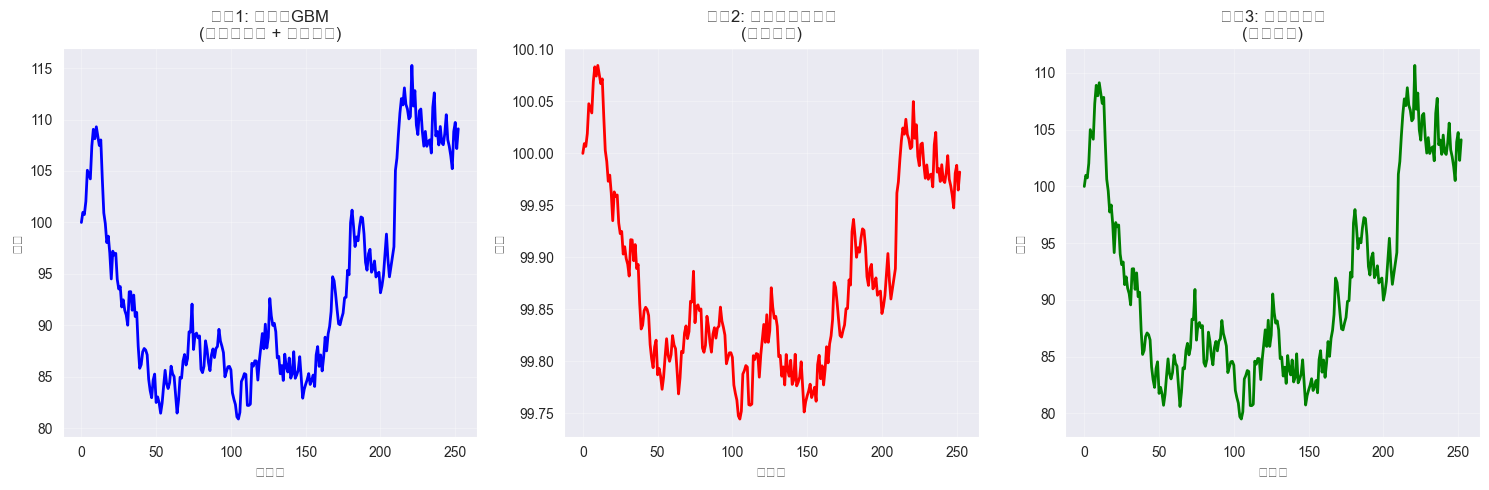

/Users/ddw/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ddw/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ddw/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


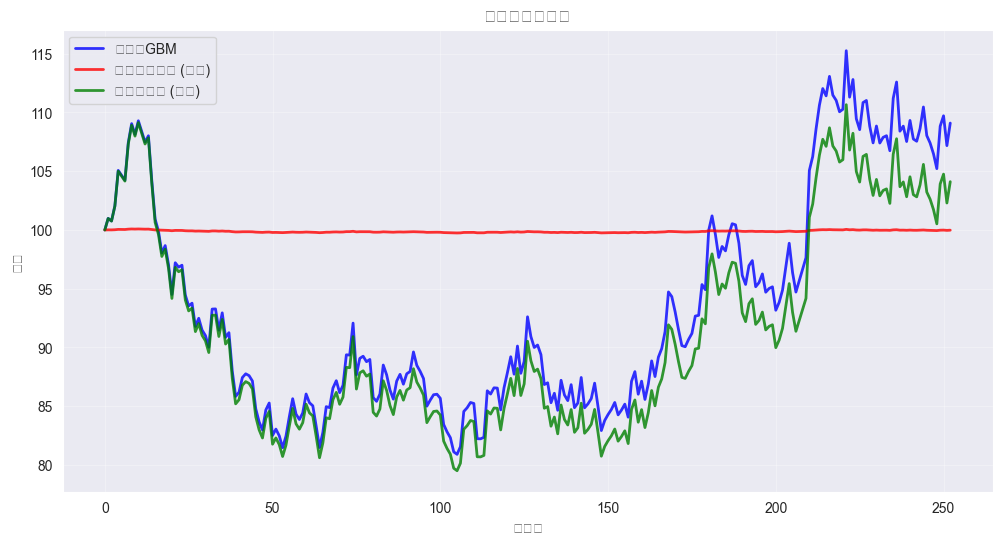

In [ ]:
# Plot comparison of three methods  # 绘制三种方法的对比图
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(path1, 'b-', linewidth=2, label='Correct GBM')  # label='正确的GBM')
plt.title('Method 1: Correct GBM\n(Log returns + Exponential transformation)')  # plt.title('方法1: 正确的GBM\n(对数收益率 + 指数变换)')
plt.ylabel('Stock Price')  # plt.ylabel('股价')
plt.xlabel('Time Step')  # plt.xlabel('时间步')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(path2, 'r-', linewidth=2, label='Direct normal distribution')  # label='直接正态分布')
plt.title('Method 2: Direct normal distribution\n(Wrong method)')  # plt.title('方法2: 直接用正态分布\n(错误方法)')
plt.ylabel('Stock Price')  # plt.ylabel('股价')
plt.xlabel('Time Step')  # plt.xlabel('时间步')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(path3, 'g-', linewidth=2, label='Arithmetic returns')  # label='算术收益率')
plt.title('Method 3: Arithmetic returns\n(Wrong method)')  # plt.title('方法3: 算术收益率\n(错误方法)')
plt.ylabel('Stock Price')  # plt.ylabel('股价')
plt.xlabel('Time Step')  # plt.xlabel('时间步')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot comparison of all three paths on the same chart  # 绘制三条路径在同一图上的对比
plt.figure(figsize=(12, 6))
plt.plot(path1, 'b-', linewidth=2, label='Correct GBM', alpha=0.8)  # label='正确的GBM', alpha=0.8)
plt.plot(path2, 'r-', linewidth=2, label='Direct normal distribution (Wrong)', alpha=0.8)  # label='直接正态分布 (错误)', alpha=0.8)
plt.plot(path3, 'g-', linewidth=2, label='Arithmetic returns (Wrong)', alpha=0.8)  # label='算术收益率 (错误)', alpha=0.8)
plt.title('Comparison of Three Methods')  # plt.title('三种方法的对比')
plt.ylabel('Stock Price')  # plt.ylabel('股价')
plt.xlabel('Time Step')  # plt.xlabel('时间步')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 详细解释：为什么需要对数收益率和指数变换

从上面的对比可以看出关键差异：

### 1. **正确的GBM方法**（蓝线）
- 使用对数收益率：`log_returns = (μ + r - σ²/2)dt + σ√dt * ε`
- 通过指数变换：`S_t = S_0 * exp(累积对数收益率)`
- **特点**：股价永远为正，符合实际股票的特性

### 2. **错误方法：直接用正态分布**（红线）
- 直接将正态分布随机数作为股价变化
- **问题**：
  - 股价变化幅度太小（几乎是平线）
  - 不符合股票的实际波动性
  - 缺乏复利效应

### 3. **错误方法：算术收益率**（绿线）
- 使用算术收益率而非对数收益率
- **问题**：
  - 可能产生负股价（虽然这个例子中没有）
  - 数学上不符合几何布朗运动的性质

### **为什么需要对数收益率？**

1. **确保股价非负**
   - 对数收益率可以是任意实数
   - 通过指数变换后，股价始终为正数
   - 符合实际股票价格的特性

2. **复利效应**
   - 对数收益率是可以直接相加的
   - `log(S_t/S_0) = log(S_t/S_{t-1}) + log(S_{t-1}/S_{t-2}) + ... + log(S_1/S_0)`
   - 这反映了股票收益的复利性质

3. **数学性质**
   - 对数正态分布是几何布朗运动的核心
   - 如果 log(S_t/S_0) 服从正态分布，那么 S_t 服从对数正态分布
   - 这符合股票价格的统计特性

### **如果删除对数收益率或指数变换会怎样？**

- **删除对数收益率**：股价可能变成负数，不符合实际
- **删除指数变换**：得到的是算术布朗运动，不是几何布朗运动，波动性模式不正确
- **都删除**：就变成了简单的随机游走，无法正确模拟股票价格行为

这就是为什么你删除其中一个后，图形就不再正确地反映股票价格的真实行为了！

演示：删除指数变换的后果
正确方法 - 最终股价: 109.10
正确方法 - 最低股价: 80.91
正确方法 - 最高股价: 115.25
删除指数变换 - 最终股价: 100.07
删除指数变换 - 最低股价: 99.79
删除指数变换 - 最高股价: 100.14


/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/3832727020.py:52: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/3832727020.py:52: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/3832727020.py:52: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/3832727020.py:52: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_24127/3832727020.py:52: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/i

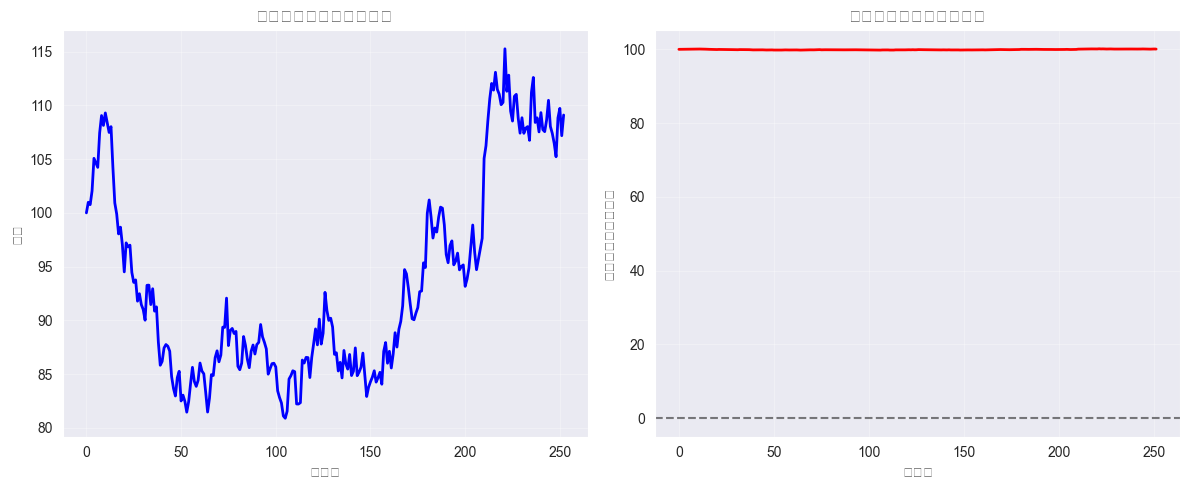

In [ ]:
# Demonstration: What happens if we remove exponential transformation  # 演示：如果删除指数变换会怎样
print("Demonstration: Consequences of removing exponential transformation")  # print("演示：删除指数变换的后果")
print("="*50)

# Correct method  # 正确的方法
np.random.seed(42)
S0 = 100
sigma = 0.3
t = 1
r = 0.05
mu = 0.1
n_steps = 252
dt = t/n_steps

noise = np.random.normal(0, 1, n_steps)
log_returns = (mu + r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

# Correct: use exponential transformation  # 正确：使用指数变换
correct_path = S0 * np.exp(np.cumsum(log_returns))
print(f"Correct method - Final stock price: {correct_path[-1]:.2f}")  # print(f"正确方法 - 最终股价: {correct_path[-1]:.2f}")
print(f"Correct method - Minimum stock price: {correct_path.min():.2f}")  # print(f"正确方法 - 最低股价: {correct_path.min():.2f}")
print(f"Correct method - Maximum stock price: {correct_path.max():.2f}")  # print(f"正确方法 - 最高股价: {correct_path.max():.2f}")

# Wrong: remove exponential transformation, directly accumulate log returns  # 错误：删除指数变换，直接累加对数收益率
wrong_path = np.zeros(n_steps)
wrong_path[0] = S0
for i in range(1, n_steps):
    wrong_path[i] = wrong_path[i-1] + log_returns[i-1]  # Direct addition, no exp  # 直接相加，不用exp

print(f"Remove exponential transformation - Final stock price: {wrong_path[-1]:.2f}")  # print(f"删除指数变换 - 最终股价: {wrong_path[-1]:.2f}")
print(f"Remove exponential transformation - Minimum stock price: {wrong_path.min():.2f}")  # May be negative!  # print(f"删除指数变换 - 最低股价: {wrong_path.min():.2f}")  # 可能是负数！
print(f"Remove exponential transformation - Maximum stock price: {wrong_path.max():.2f}")  # print(f"删除指数变换 - 最高股价: {wrong_path.max():.2f}")

# Plot comparison  # 绘制对比
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.insert(correct_path, 0, S0), 'b-', linewidth=2)
plt.title('Correct Method: Use Exponential Transformation')  # plt.title('正确方法：使用指数变换')
plt.ylabel('Stock Price')  # plt.ylabel('股价')
plt.xlabel('Time Step')  # plt.xlabel('时间步')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(wrong_path, 'r-', linewidth=2)
plt.title('Wrong Method: Remove Exponential Transformation')  # plt.title('错误方法：删除指数变换')
plt.ylabel('Stock Price (May be negative!)')  # plt.ylabel('股价（可能为负！）')
plt.xlabel('Time Step')  # plt.xlabel('时间步')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Zero line')  # label='零线')

plt.tight_layout()
plt.show()